In [10]:
import os
from google.colab import drive
from tqdm import tqdm
import cv2
drive.mount('/content/drive')
%cd /content/drive/MyDrive/nerf-pytorch-master

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/nerf-pytorch-master


In [2]:
from generate_material_map import generate_map
from generate_feature_map import generate_f_map
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


(-0.5, 199.5, 199.5, -0.5)

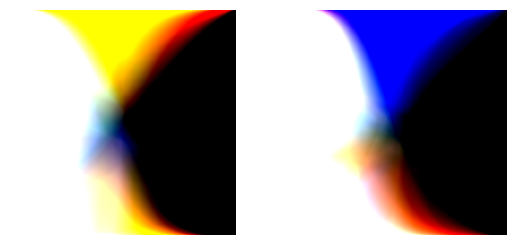

In [3]:
mp_1 = generate_map("pickle_files/blue_12.pkl", False, True)
mp_2 = generate_map("pickle_files/blue_12.pkl", False, False)
plt.subplot(1,2,1)
plt.imshow(mp_1)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(mp_2)
plt.axis('off')

(65536, 2)
0 200


100%|██████████| 65536/65536 [00:03<00:00, 18508.61it/s]


True

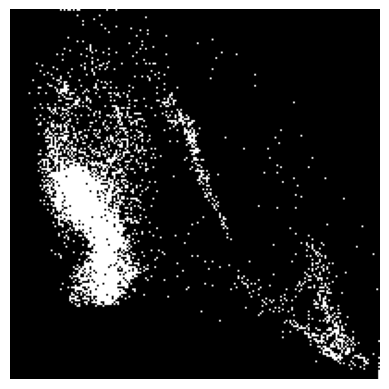

In [13]:
f_1 = generate_f_map("pickle_files/blue_12.pkl", False)
f_1_alpha = f_1[0]
f_1 = f_1[1].cpu().detach().numpy()
f_1 = np.tanh(f_1/8)
f_1 = f_1/2.+0.5
f_1 = np.array(f_1 * mp_1.shape[0], np.int16)
print(f_1.shape)
print(f_1.min(), f_1.max())
fp_1 = np.zeros_like(mp_1)
for i in tqdm(range(f_1.shape[0])):
  f_1 = f_1.clip(0,199)
  if f_1_alpha[i] > 0.5:
    fp_1[f_1[i,1], f_1[i,0]] = np.array([255.0,255.0,255.0])

plt.imshow(fp_1)
plt.axis('off')
cv2.imwrite("blue_1.png", fp_1)